# Machine Learning Computer Homework 4
## Principal Component Analysis (PCA)
In this question you will implement the PCA from scratch and apply it for dimensionality
reduction and image denoising. you will use the well-known MNIST data set that is commonly used for training various image processing systems.

You are only required to write code for TODO parts with given descriptions.

Feel free to contact me via telegram if you have any question: @mtv_tavana

In [1]:
# import the required libraries
# you can use any library which is needed for your approaches.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 1. Data Preparation
The MNIST data set is a large data set of handwritten digits (from
0 to 9), containing 60000 gray-scale images for training and 10000 for testing, each image has 28x28 pixels with range of possible values from 0 to 255.

we will consider a small sample of MNIST data set with size of 2000 which is attached to your homework zip file as "MNIST_DATASET_PNG" folder.

Re-scale the images to [0, 1] dividing them by 255. Vectorize each image xi ∈ $R^d$ and form a matrix X=$[x1, . . . , xn]^T$ ∈ $R_{n×d}$.
Remark that we will have d=784 and n=2000.


2000
784


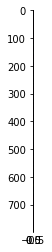

In [3]:
# TODO: load the data set and Re-scale the images to [0, 1] dividing them by 255.
# TODO: vectorize each image and forming matrix
from PIL import Image
import cv2 

dataset = []
labels = []
for i in range(10):
  items = os.listdir('/content/drive/MyDrive/MNIST_DATASET_PNG/'+str(i))
  for filename in items:
    img = cv2.imread('/content/drive/MyDrive/MNIST_DATASET_PNG/'+str(i)+'/'+filename,0) 
    #img = Image.open('/content/drive/MyDrive/MNIST_DATASET_PNG/'+str(i)+'/'+filename)
    img = img/255
    img = img.reshape(784,-1)
    dataset.append(img)
    labels.append(i)


print(len(dataset))
print(len(dataset[0]))
plt.imshow(dataset[0])

#### 2. Compute the Eigendecomposition
Compute the eigendecomposition of the sample covariance matrix and use the eigenvalues to calculate the percentage of variance explained (given by the eigenvalues).
Plot the cumulative sum of these percentages (also known as cumulative explained variance. you can read about it in [cumulative explained variance](https://vitalflux.com/pca-explained-variance-concept-python-example/)) versus the number of components.

*Hint: you can use cumsum from Numpy to calculate the cumulative sum.*


The shape of data matrix =  (2000, 784)
The shape of variance matrix =  (784, 784)


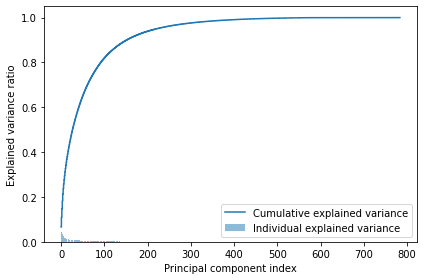

In [4]:
# TODO: Compute the eigendecomposition

from sklearn.preprocessing import StandardScaler
from numpy.linalg import eigh

dataset = np.array(dataset).reshape(2000,784)
sample_data = StandardScaler().fit_transform(dataset)

#cov_matrix = np.matmul(sample_data.T , sample_data)
cov_matrix = np.cov(sample_data.T)
print ( "The shape of variance matrix = ", cov_matrix.shape)

egnvalues, egnvectors = eigh(cov_matrix)


# TODO: Plot the cumulative explained variance 
total_egnvalues = sum(egnvalues)
var_exp = [(i/total_egnvalues) for i in sorted(egnvalues, reverse=True)]
cum_sum_exp = np.cumsum(var_exp)
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### 3. Reduce the Dimensionality
Apply the PCA via Eigendecomposition to reduce the dimensionality of the images for each p ∈ {50, 250, 500}.

Compute the normalized reconstruction error in terms of the Frobenius norm, i.e. $e_p = \frac{||X - \^{X_p}||_F}{||X||_F}$ , where $X$ denotes the input matrix, and $\^{X_p}$ denotes the recovered matrix associated to each p. 

Visualize some recovered images and compare them with their corresponding original images.

what happens when we reduce the number of components p?


(784, 784)
(784, 784)
(784, 784)


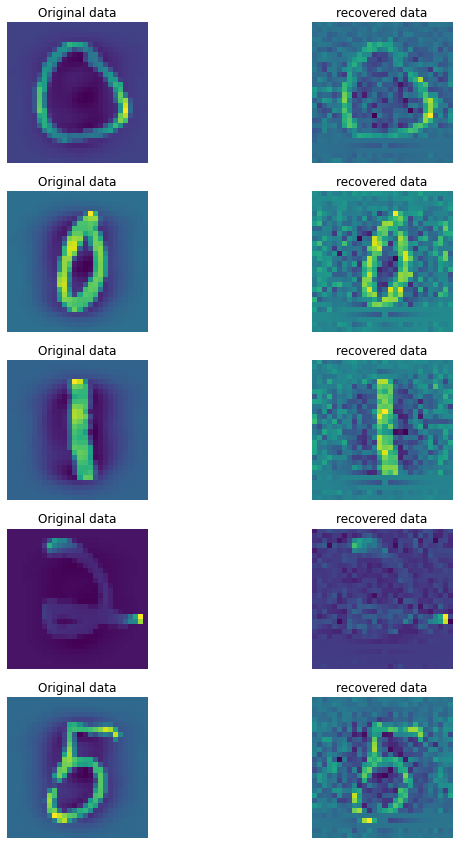

The normalized reconstruction error for p respectively equals to 50, 250, and 500 is :  [0.9724057736821504, 0.835936275103169, 0.6064529704354489]


Text(0, 0.5, 'error')

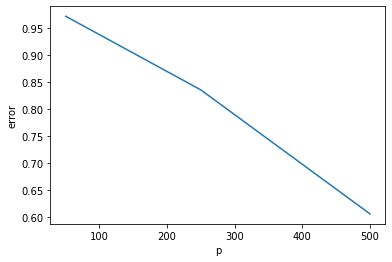

In [34]:
# TODO: Apply the PCA
# TODO: Compute the normalized reconstruction error

# The eigh function returns eigenvalues in ascending order, so We will transpose the eigenvector to make it easy to use it further.
index  = np.argsort(-egnvalues)
egnvalues = egnvalues[index]
egnvectors = egnvectors[:, index]

error = []
for p in [50,250,500]:
  P = egnvectors[0:p]
  projectedMatrix = P.T @ P
  print(projectedMatrix.shape)
  recoveredMatrix = sample_data@projectedMatrix
  e = np.linalg.norm(sample_data-recoveredMatrix, 'fro')/np.linalg.norm(sample_data, 'fro')
  error.append(e)
  #projectedData = np.matmul(P, sample_data.T)
  #print (" resultanat new data points' shape ", egnvectors[0:p].shape, "X", sample_data.T.shape," = ", projectedData.shape)
  

# TODO: Visualize recovered images for p = 500


fig = plt.figure(figsize=(10,15))

plt.subplot(5,2,1)
plt.imshow(sample_data[0].reshape(28,28))
plt.axis("off")
plt.title("Original data")


plt.subplot(5,2,2)
plt.imshow(recoveredMatrix[0].reshape(28,28))
plt.axis("off")
plt.title("recovered data")



plt.subplot(5,2,3)
plt.imshow(sample_data[100].reshape(28,28))
plt.axis("off")
plt.title("Original data")


plt.subplot(5,2,4)
plt.imshow(recoveredMatrix[100].reshape(28,28))
plt.axis("off")
plt.title("recovered data")

plt.subplot(5,2,5)
plt.imshow(sample_data[300].reshape(28,28))
plt.axis("off")
plt.title("Original data")


plt.subplot(5,2,6)
plt.imshow(recoveredMatrix[300].reshape(28,28))
plt.axis("off")
plt.title("recovered data")



plt.subplot(5,2,7)
plt.imshow(sample_data[500].reshape(28,28))
plt.axis("off")
plt.title("Original data")


plt.subplot(5,2,8)
plt.imshow(recoveredMatrix[500].reshape(28,28))
plt.axis("off")
plt.title("recovered data")


plt.subplot(5,2,9)
plt.imshow(sample_data[1000].reshape(28,28))
plt.axis("off")
plt.title("Original data")


plt.subplot(5,2,10)
plt.imshow(recoveredMatrix[1000].reshape(28,28))
plt.axis("off")
plt.title("recovered data")

plt.show()

print('The normalized reconstruction error for p respectively equals to 50, 250, and 500 is : ',error)
plt.plot([50,250,500],error)
plt.xlabel('p')
plt.ylabel('error')

#### 4. Image noising
Considering the same input matrix, let’s add some Gaussian noise (make sure that the range of possible values of the generated noisy data will remain between 0 and1, as well as the input data) with zero mean and variance $σ^2$ = 0.25.

Visualize the corrupted images and compare them with their corresponding original images versus the number of components, as in the first item. 

Compare it with the one obtained in the noiseless case.


[[0.05609501 0.09102292 0.07171367 ... 0.07096945 0.06797107 0.05602483]
 [0.07304953 0.06864606 0.05991683 ... 0.04668917 0.07088844 0.07099147]
 [0.0685888  0.07787085 0.07440298 ... 0.07034727 0.0645434  0.06729778]
 ...
 [0.07320031 0.07859389 0.08447042 ... 0.0744572  0.05670095 0.06389669]
 [0.04825681 0.07359059 0.06909369 ... 0.06238434 0.06614665 0.06634916]
 [0.07000463 0.07934409 0.04154267 ... 0.05322556 0.06228342 0.05557663]]


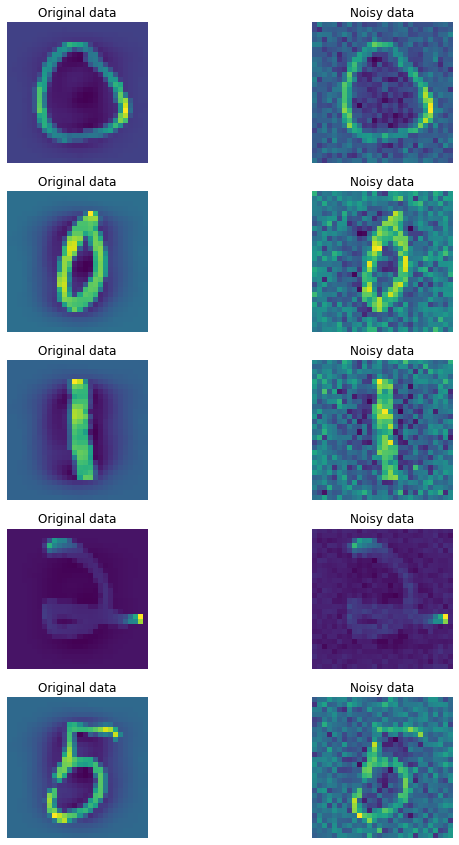

In [47]:
from sklearn import preprocessing
# TODO: Adding Gaussian noise
noise = np.random.normal(0,0.5,(dataset.shape))

noisy_data = sample_data+noise
#noisy_data = dataset+noise
noisy_data = (noisy_data-np. min(noisy_data))/(np. max(noisy_data)-np.min(noisy_data))


print(noisy_data)

# TODO: Visualize the corrupted images
# TODO: Comparing with noiseless case
fig = plt.figure(figsize=(10,15))

plt.subplot(5,2,1)
plt.imshow(sample_data[0].reshape(28,28))
plt.axis("off")
plt.title("Original data")


plt.subplot(5,2,2)
plt.imshow(noisy_data[0].reshape(28,28))
plt.axis("off")
plt.title("Noisy data")



plt.subplot(5,2,3)
plt.imshow(sample_data[100].reshape(28,28))
plt.axis("off")
plt.title("Original data")


plt.subplot(5,2,4)
plt.imshow(noisy_data[100].reshape(28,28))
plt.axis("off")
plt.title("Noisy data")

plt.subplot(5,2,5)
plt.imshow(sample_data[300].reshape(28,28))
plt.axis("off")
plt.title("Original data")


plt.subplot(5,2,6)
plt.imshow(noisy_data[300].reshape(28,28))
plt.axis("off")
plt.title("Noisy data")



plt.subplot(5,2,7)
plt.imshow(sample_data[500].reshape(28,28))
plt.axis("off")
plt.title("Original data")


plt.subplot(5,2,8)
plt.imshow(noisy_data[500].reshape(28,28))
plt.axis("off")
plt.title("Noisy data")


plt.subplot(5,2,9)
plt.imshow(sample_data[1000].reshape(28,28))
plt.axis("off")
plt.title("Original data")


plt.subplot(5,2,10)
plt.imshow(noisy_data[1000].reshape(28,28))
plt.axis("off")
plt.title("Noisy data")

plt.show()

#### 5. Recovering Images
Now we will apply the PCA for image denoising. Generate the noisy data, for each $σ^2$ ∈ {0.15, 0.25, 0.50}.
Apply the PCA via Eigendecomposition for each $σ^2$ and fixing p = 250.

Visualize some recovered images and compare them with their corresponding noisy images.

Compute the normalized reconstruction error in terms of the Frobenius norm, obtained for all values of $σ^2$, with respect to the original images.


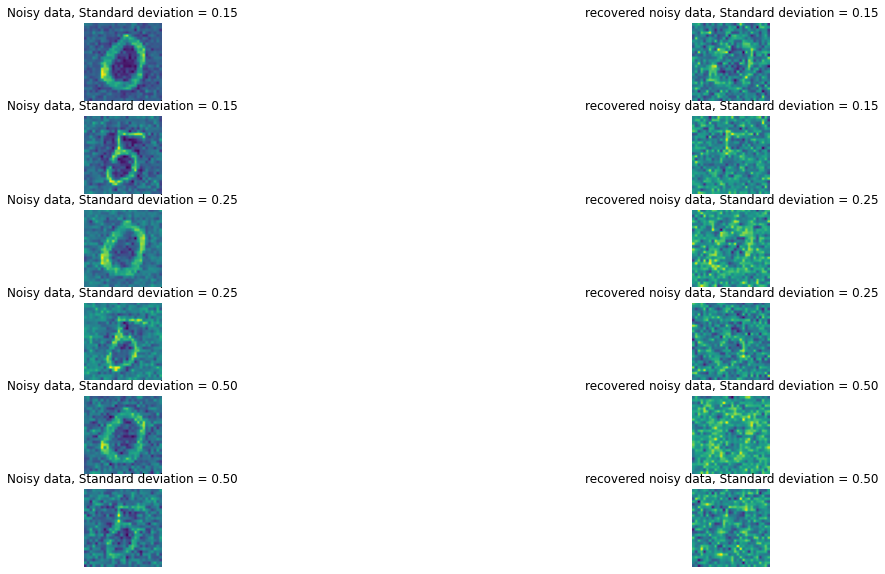

In [48]:
error = []
i = 1
fig = plt.figure(figsize=(20,10))
for var in np.sqrt([0.15, 0.25, 0.50]):
  # TODO: Generating noisy data
  noise = np.random.normal(0,var,(sample_data.shape))
  noisy_data = sample_data+noise
  noisy_data = (noisy_data-np. min(noisy_data))/(np. max(noisy_data)-np.min(noisy_data))
  # TODO: Apply PCA via Eigendecomposition
  standardized_data = StandardScaler().fit_transform(noisy_data)
  noisy_std = standardized_data
  #cov_matrix = np.matmul(noisy_std.T , noisy_std)
  cov_matrix = np.cov(noisy_std.T)
  egnvalues, egnvectors = eigh(cov_matrix)
  # TODO: Visualize recovered images
  # TODO: compute the normalized reconstruction
  index  = np.argsort(-egnvalues)
  egnvalues = egnvalues[index]
  egnvectors = egnvectors[:, index]

  P = egnvectors[0:250]
  projectedMatrix = P.T @ P
  recoveredMatrix = noisy_std@projectedMatrix
  e = np.linalg.norm(sample_data-recoveredMatrix, 'fro')/np.linalg.norm(sample_data, 'fro')
  error.append(e)

  plt.subplot(6,2,i)
  plt.imshow(noisy_data[30].reshape(28,28))
  plt.axis("off")
  plt.title("Noisy data, Standard deviation = "+"{:.2f}".format(var**2))
  
  plt.subplot(6,2,i+1)
  plt.imshow(recoveredMatrix[30].reshape(28,28))
  plt.axis("off")
  plt.title("recovered noisy data, Standard deviation = "+"{:.2f}".format(var**2))

  plt.subplot(6,2,i+2)
  plt.imshow(noisy_data[1000].reshape(28,28))
  plt.axis("off")
  plt.title("Noisy data, Standard deviation = "+"{:.2f}".format(var**2))
  
  plt.subplot(6,2,i+3)
  plt.imshow(recoveredMatrix[1000].reshape(28,28))
  plt.axis("off")
  plt.title("recovered noisy data, Standard deviation = "+"{:.2f}".format(var**2))

  i = i+4